Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7944\2426823989.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66929478  0.94353482 -1.14280809 ...  0.62866049 -0.7173672
  0.94593844]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(


              precision    recall  f1-score   support

      normal       0.33      0.36      0.34      3996
      attack       0.34      0.31      0.33      4048

   micro avg       0.33      0.34      0.34      8044
   macro avg       0.33      0.34      0.34      8044
weighted avg       0.33      0.34      0.34      8044

confusion Matrix:
 [[1437 1253 1306]
 [1442 1273 1333]
 [1463 1233 1260]]


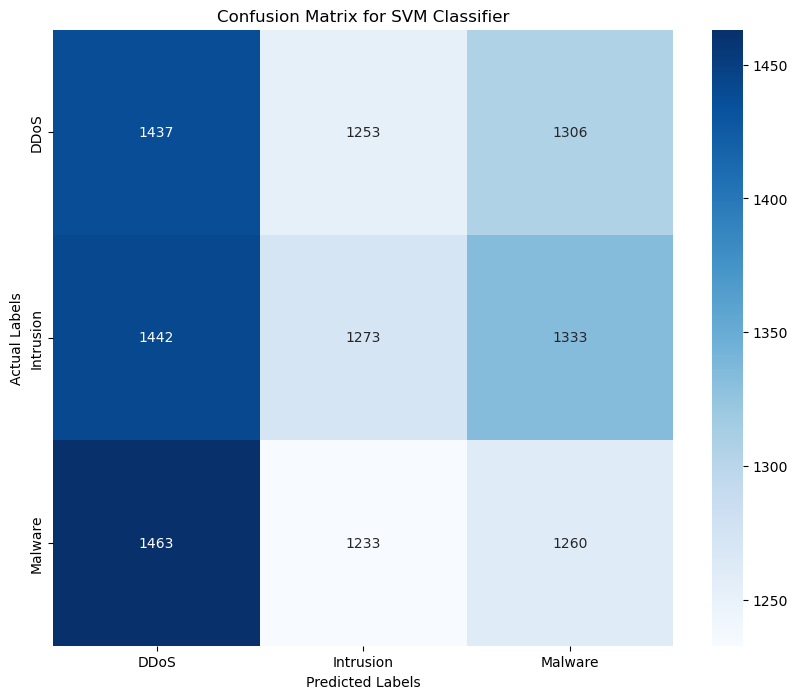

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
synthetic_data_path = '../sample_dataset/cybersecurity_attacks.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

print(synthetic_data.isnull().sum())

# Define the features and the target
features = ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source', 
            'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
            'Malware Indicators', 'Alerts/Warnings']
synthetic_data_filtered = synthetic_data[features + ['Attack Type']]

# Encode categorical features
Attack_Type_encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source', 
               'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    synthetic_data_filtered.loc[:, column] = le.fit_transform(synthetic_data_filtered[column])
    Attack_Type_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']]
)

# Prepare the feature matrix (X) and target (y)
X = synthetic_data_filtered.drop(columns=['Attack Type'])
y = synthetic_data_filtered['Attack Type']

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Handle missing values
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred, target_names=['normal', 'attack'], labels=[0, 1])

print(classification_report_rf)

print("confusion Matrix:\n", confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=target_encoder.classes_, 
    yticklabels=target_encoder.classes_
)
plt.title("Confusion Matrix for RF Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()





C:\Users\DELL\AppData\Local\Temp\ipykernel_7944\3167990988.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66929478  0.94353482 -1.14280809 ...  0.62866049 -0.7173672
  0.94593844]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(


              precision    recall  f1-score   support

      normal       0.67      0.94      0.78      8044
      attack       0.32      0.06      0.09      3956

    accuracy                           0.65     12000
   macro avg       0.49      0.50      0.44     12000
weighted avg       0.55      0.65      0.56     12000

confusion Matrix:
 [[7567  477]
 [3735  221]]


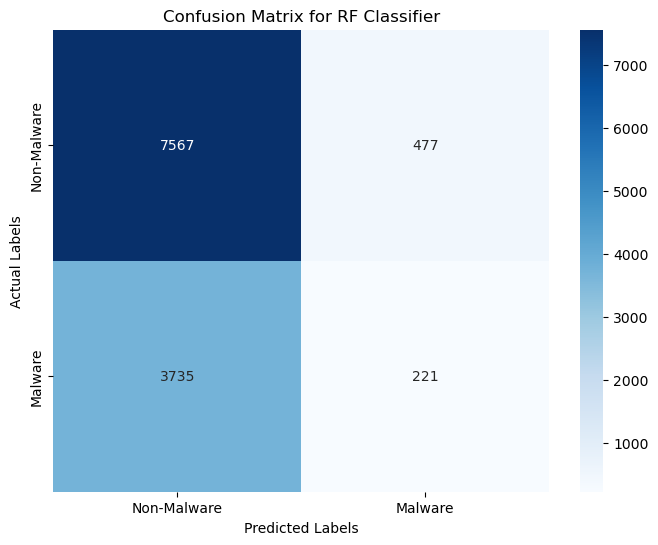

In [11]:
#New Code for KNN

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
synthetic_data_path = '../sample_dataset/cybersecurity_attacks.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

# Define the features and the target
features = ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source', 
            'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
            'Malware Indicators', 'Alerts/Warnings']
synthetic_data_filtered = synthetic_data[features + ['Attack Type']]

# Encode categorical features
Attack_Type_encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 'Log Source', 
               'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    synthetic_data_filtered.loc[:, column] = le.fit_transform(synthetic_data_filtered[column])
    Attack_Type_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    synthetic_data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']]
)



binary_attack_type = (synthetic_data_filtered['Attack Type'] == 'Malware').astype(int)

# Prepare the feature matrix (X) and target (y)
X = synthetic_data_filtered.drop(columns=['Attack Type'])
y = binary_attack_type

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred, target_names=['normal', 'attack'], labels=[0, 1])

print(classification_report_rf)

print("confusion Matrix:\n", confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.title("Confusion Matrix for RF Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()